In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
G=nx.MultiDiGraph()
node1=("A","B","C","D","E")
G.add_nodes_from(node1)
distances=[("A","B",7),("A","C",3),("B","D",8),("C","D",8),("B","A",1),("A","E",10),("E","C",4)]
G.add_weighted_edges_from(distances)

### Algoritmo de Dirijkstra

Grafo


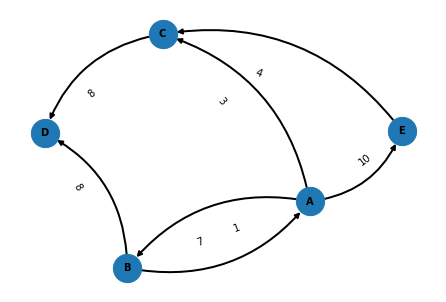

In [3]:
print("Grafo")

##No permite graficar con Multidigraph

G1=nx.DiGraph()
node1=("A","B","C","D","E")
G1.add_nodes_from(node1)
distances=[("A","B",7),("A","C",3),("B","D",8),("C","D",8),("B","A",1),("A","E",10),("E","C",4)]
G1.add_weighted_edges_from(distances)

## Plot
pos=nx.spectral_layout(G1) 
nx.draw(G1, pos, with_labels=True, font_size=10,font_weight='bold',node_size=800,width=2,connectionstyle='arc3, rad = 0.3')
arc_weight=nx.get_edge_attributes(G1,'weight')
nx.draw_networkx_edge_labels(G1, pos,  edge_labels=arc_weight,label_pos=0.4)
plt.show()

In [20]:
print("Lista de vértices")
print(node1)
print()
print("Ingrese el vértice por el cual quiere iniciar")
first=input()

Lista de vértices
('A', 'B', 'C', 'D', 'E')

Ingrese el vértice por el cual quiere iniciar
D


In [21]:
#Inicialización
first2=first
dist={node:float('inf') for node in node1}#Diccionario de datos (Almacena distancias a first)
unv={node:float('inf') for node in node1}#Nodos que no he visitado
prev={node:None for node in node1}#Los nodos por los que ya pasó
cd=0
dist[first]=cd
prev[first]=first
while True:
    for n in distances:
        if (n[0]==first) and (dist[n[1]]>n[2]+cd):
            dist[n[1]]=n[2]+cd
            unv[n[1]]=n[2]+cd
            prev[n[1]]=first
        if (n[1]==first) and (dist[n[1]]>n[2]+cd):
            dist[n[1]]=n[2]+cd
            unv[n[1]]=n[2]+cd
            prev[n[1]]=first
    unv.pop(first)
    if not unv:break
    print(dist,prev)
    first,dc=sorted(unv.items(),key=lambda x:x[1])[0]
print()
print("Lista de pesos desde "+first2)
print(dist)
print()
print("Recorridos iniciando en "+first2)
print(prev)

{'A': inf, 'B': inf, 'C': inf, 'D': 0, 'E': inf} {'A': None, 'B': None, 'C': None, 'D': 'D', 'E': None}
{'A': 1, 'B': 7, 'C': 3, 'D': 0, 'E': 10} {'A': 'A', 'B': 'A', 'C': 'A', 'D': 'D', 'E': 'A'}
{'A': 1, 'B': 7, 'C': 3, 'D': 0, 'E': 10} {'A': 'A', 'B': 'A', 'C': 'A', 'D': 'D', 'E': 'A'}
{'A': 1, 'B': 7, 'C': 3, 'D': 0, 'E': 10} {'A': 'A', 'B': 'A', 'C': 'A', 'D': 'D', 'E': 'A'}

Lista de pesos desde D
{'A': 1, 'B': 7, 'C': 3, 'D': 0, 'E': 10}

Recorridos iniciando en D
{'A': 'A', 'B': 'A', 'C': 'A', 'D': 'D', 'E': 'A'}


### Algoritmo de Floyd- Warshall

In [41]:
#Creo la matriz de adyacencia con valor infinito para toda entreda mij con i distinto de j
M=[[float('inf') if i!=j else 0 for i in range(0,len(node1))] for j in range(0,len(node1))]

#Genero la matriz de adyacencia del grafo
for e in distances:
    M[node1.index(e[0])][node1.index(e[1])]=e[2]

In [42]:
M

[[0, 7, 3, inf, 10],
 [1, 0, inf, 8, inf],
 [inf, inf, 0, 8, inf],
 [inf, inf, inf, 0, inf],
 [inf, inf, 4, inf, 0]]

In [44]:
#Implementación del método trabajando solo con los indices de cada elementos en las tuplas de nodos y distancias
for i in range(0,len(node1)):
    for j in range(0,len(node1)):
        for m in range(0,len(node1)):
            if (i!=j):#Verifica que no esté en la diagonal
                if (m!=j or m!=i):#Verifica que no tome elementos en la diagonal
                    if M[i][j]>M[i][m]+M[m][j]: 
                        #Si el valor en la posición ij es mayor que la suma de las posiciones 
                        # im y mj donde m representa el vértice intermedio del recorrido
                        # entonces ese se convierte en el nuevo valor de la entrada ij
                        M[i][j]=M[i][m]+M[m][j]

In [45]:
#Impresión de resultados
for i in range(0,len(node1)):
    for j in range(0,len(node1)):
        print("La distancia de "+str(node1[i])+" a "+str(node1[j])+ " es: "+str(M[i][j]))

La distancia de A a A es: 0
La distancia de A a B es: 7
La distancia de A a C es: 3
La distancia de A a D es: 11
La distancia de A a E es: 10
La distancia de B a A es: 1
La distancia de B a B es: 0
La distancia de B a C es: 4
La distancia de B a D es: 8
La distancia de B a E es: 11
La distancia de C a A es: inf
La distancia de C a B es: inf
La distancia de C a C es: 0
La distancia de C a D es: 8
La distancia de C a E es: inf
La distancia de D a A es: inf
La distancia de D a B es: inf
La distancia de D a C es: inf
La distancia de D a D es: 0
La distancia de D a E es: inf
La distancia de E a A es: inf
La distancia de E a B es: inf
La distancia de E a C es: 4
La distancia de E a D es: 12
La distancia de E a E es: 0
